In [1]:
import pandas as pd

# Load the dataset with the correct path
df = pd.read_csv('/kaggle/input/carbon-emissions-dataset/MER_T12_06.csv')  # Replace with the actual path

# Display the first few rows of the dataset
print(df.head())

       MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide  


       MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


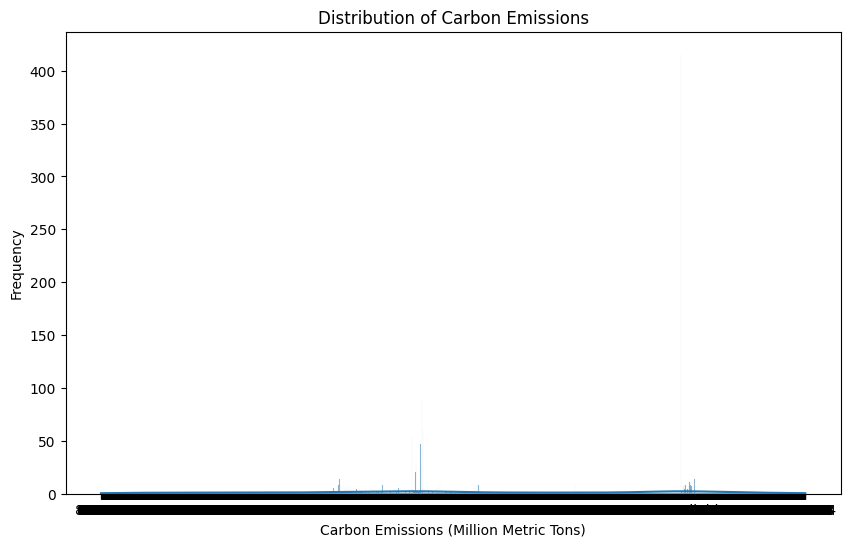

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with the correct path
df = pd.read_csv('/kaggle/input/carbon-emissions-dataset/MER_T12_06.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


# Plot a histogram of the 'Value' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], kde=True)
plt.title('Distribution of Carbon Emissions')
plt.xlabel('Carbon Emissions (Million Metric Tons)')
plt.ylabel('Frequency')
plt.show()

In [3]:
print(df.columns)

Index(['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'], dtype='object')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


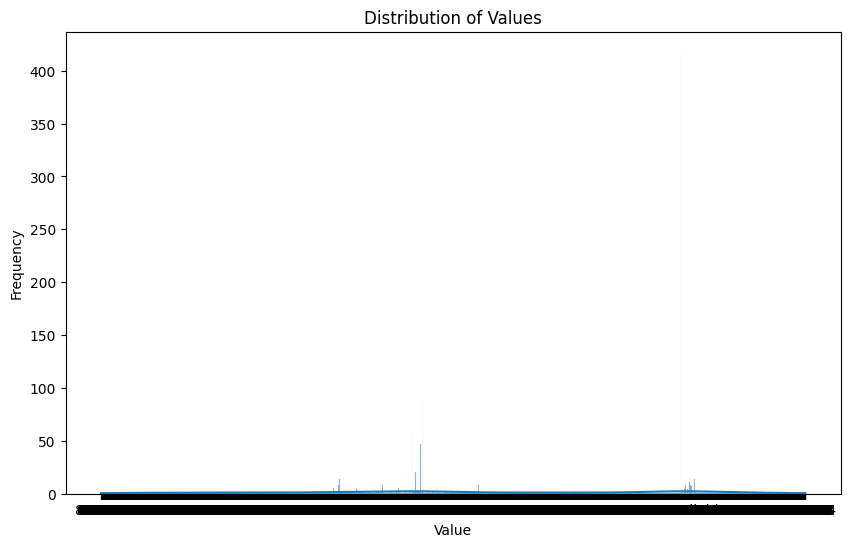

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a histogram of the 'Value' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Check for values that don't match the expected '%Y%m' format
invalid_dates = df[~df['YYYYMM'].astype(str).str.match(r'^\d{6}$')]
print(invalid_dates)

Empty DataFrame
Columns: [MSN, YYYYMM, Value, Column_Order, Description, Unit]
Index: []


Invalid dates:
Empty DataFrame
Columns: [MSN, YYYYMM, Value, Column_Order, Description, Unit]
Index: []


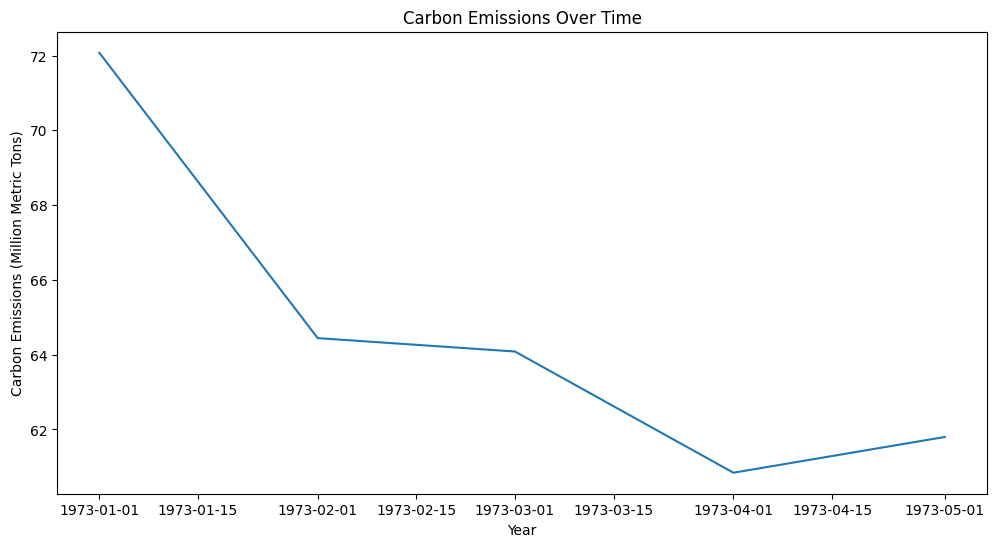

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame provided by the user
data = {
    'MSN': ['CLEIEUS']*5,
    'YYYYMM': [197301, 197302, 197303, 197304, 197305],
    'Value': ['72.076', '64.442', '64.084', '60.842', '61.798'],
    'Column_Order': [1, 1, 1, 1, 1],
    'Description': ['Coal Electric Power Sector CO2 Emissions']*5,
    'Unit': ['Million Metric Tons of Carbon Dioxide']*5
}
df = pd.DataFrame(data)

# Convert the 'Value' column to numeric
df['Value'] = pd.to_numeric(df['Value'])

# Check for values that don't match the expected '%Y%m' format
invalid_dates = df[~df['YYYYMM'].astype(str).str.match(r'^\d{6}$')]
print("Invalid dates:")
print(invalid_dates)

# Remove invalid date values
df = df[df['YYYYMM'].astype(str).str.match(r'^\d{6}$')]

# Convert 'YYYYMM' to datetime format
df['Date'] = pd.to_datetime(df['YYYYMM'].astype(str), format='%Y%m')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'])
plt.title('Carbon Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions (Million Metric Tons)')
plt.show()

/tmp/ipykernel_18/2484809246.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1973-01-01', periods=100, freq='M')


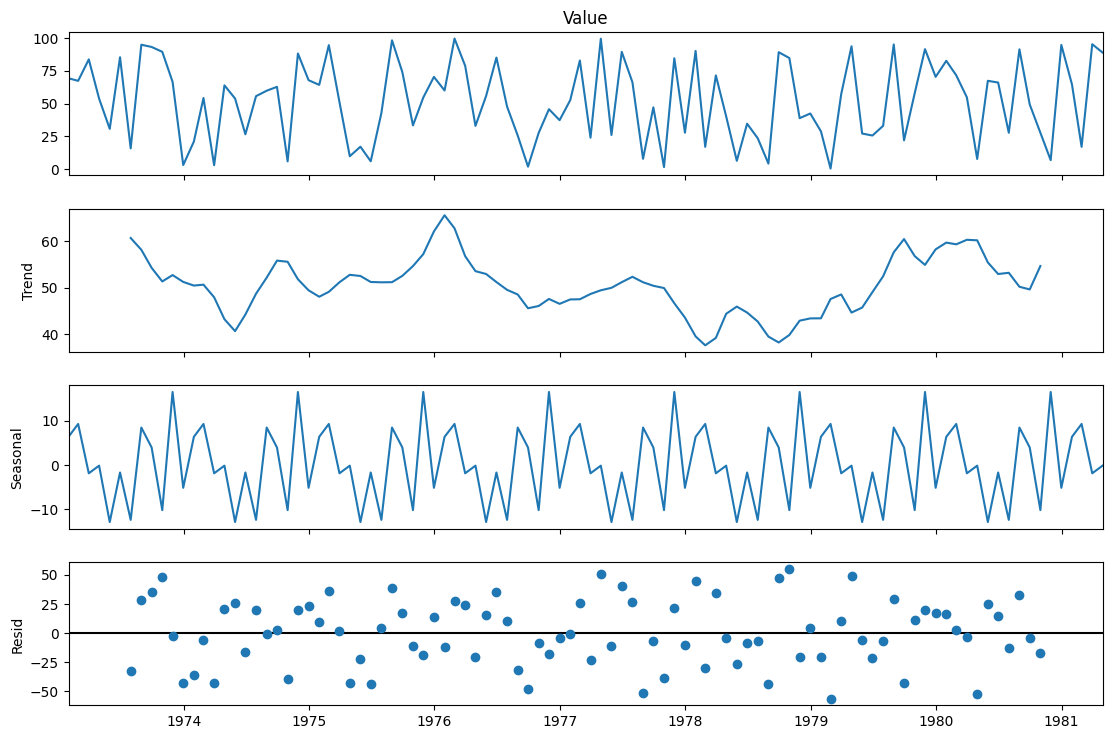

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate a larger sample dataset for illustration
dates = pd.date_range(start='1973-01-01', periods=100, freq='M')
values = np.random.rand(100) * 100  # Random values for illustration
data = {'Date': dates, 'Value': values}
df_large = pd.DataFrame(data)

# Set the 'Date' column as the index
df_large.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_large['Value'], model='additive', period=12)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


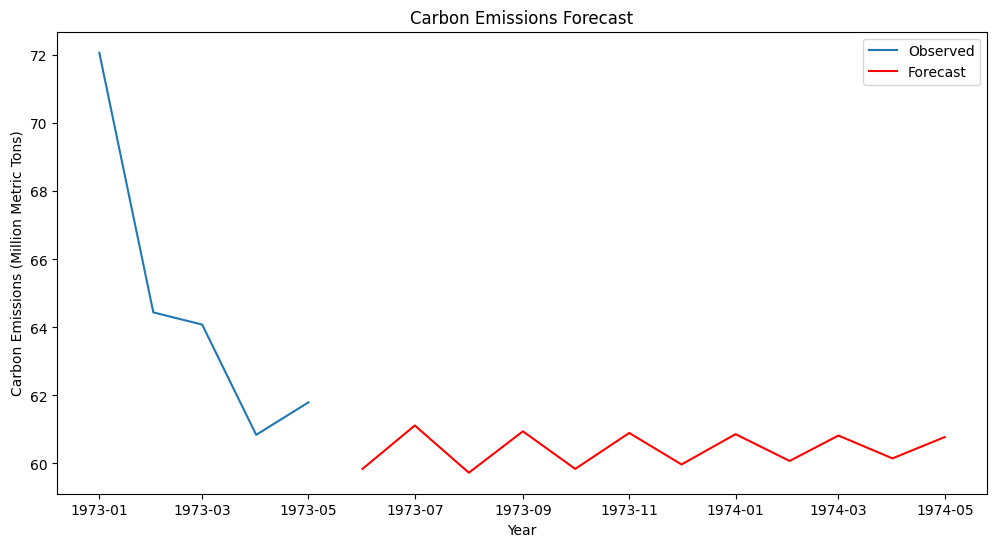

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(df['Value'], order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)  # Forecast the next 12 months

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Carbon Emissions Forecast')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions (Million Metric Tons)')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


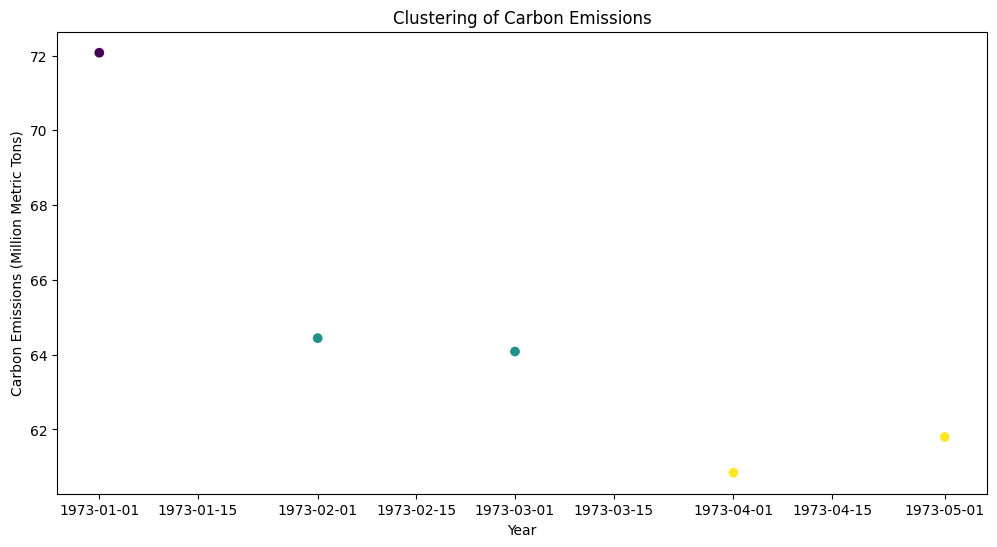

In [9]:
from sklearn.cluster import KMeans

# Prepare data for clustering
X = df[['Value']].values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Value'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering of Carbon Emissions')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions (Million Metric Tons)')
plt.show()

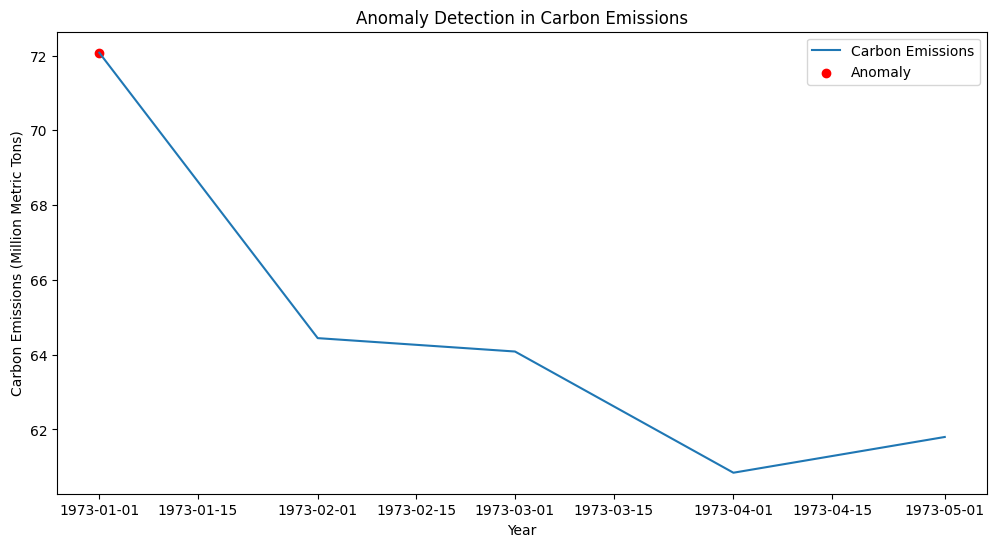

In [10]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso = IsolationForest(contamination=0.05)
df['Anomaly'] = iso.fit_predict(X)

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Carbon Emissions')
plt.scatter(df[df['Anomaly'] == -1].index, df[df['Anomaly'] == -1]['Value'], color='red', label='Anomaly')
plt.title('Anomaly Detection in Carbon Emissions')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions (Million Metric Tons)')
plt.legend()
plt.show()